In [1]:
!hostname

c1000a-s11.ufhpc


In [2]:
%load_ext autoreload
%autoreload 2

from utils import *

In [3]:
import scripts.notebooks.analysis.nanohh4b as nanohh4b

In [5]:
analysis = nanohh4b.Analysis.load(
    disable=['plot.*','print.*','.*vr.*','limits']
    )
analysis.hello()

---Arguments---
ignore_error = False
dry_run = False
dout = 
pairing = mindiag
load_init = 6
btagwp = medium
leading_btag = False
hh_mass_cut = None
no_bkg = False
no_data = False
model = None
bdisc_wp = None

<Analysis
    0: <[pending ] init()>
    1: <[pending ] apply_trigger()>
    2: <[pending ] set_bdisc_threshold(signal, bkg, data)>
    3: <[pending ] load_feynnet(signal, bkg, data)>
    4: <[pending ] load_spanet(signal, bkg, data)>
    5: <[pending ] hh_mass_cut(signal, bkg, data)>
    6: <[disabled] plot_jet_multiplicity(signal, bkg, data)>
    7: <[disabled] plot_reco_eff(signal)>
    8: <[disabled] plot_higgs(signal, bkg)>
    9: <[disabled] plot_region_vars(signal, bkg)>
   10: <[disabled] print_4btag_yields(signal, bkg, data)>
   11: <[disabled] plot_4b_control(signal, bkg, data)>
   12: <[disabled] print_3btag_yields(signal, bkg, data)>
   13: <[disabled] plot_3b_control(signal, bkg, data)>
   14: <[pending ] blind_data(data)>
   15: <[disabled] print_abcd_yields(signal,

In [6]:
analysis.run()

0:00:00 [running ] init()


  0%|          | 0/1 [00:00<?, ?it/s]

Using local path: /cmsuf/data/store/user/ekoenig/root/eosuser.cern.ch/eos/user/e/ekoenig/Ntuples/NanoHH4b/run2/mindiag_2018_0L/mc/ggHH4b_tree.root


  0%|          | 0/1 [00:00<?, ?it/s]

Using local path: /cmsuf/data/store/user/ekoenig/root/eosuser.cern.ch/eos/user/e/ekoenig/Ntuples/NanoHH4b/run2/mindiag_2018_0L/mc/qcd-mg_tree.root


  0%|          | 0/1 [00:00<?, ?it/s]

Using local path: /cmsuf/data/store/user/ekoenig/root/eosuser.cern.ch/eos/user/e/ekoenig/Ntuples/NanoHH4b/run2/mindiag_2018_0L/mc/ttbar-powheg_tree.root


  0%|          | 0/1 [00:00<?, ?it/s]

Using local path: /cmsuf/data/store/user/ekoenig/root/eosuser.cern.ch/eos/user/e/ekoenig/Ntuples/NanoHH4b/run2/mindiag_2018_0L/data/jetht_tree.root


100%|██████████| 1/1 [00:02<00:00,  2.32s/it]


0:00:56 [  done  ] 0:00:56
        [running ] apply_trigger()
        [  done  ] 0:00:00
        [running ] set_bdisc_threshold(signal, bkg, data)
        [  done  ] 0:00:00
        [running ] load_feynnet(signal, bkg, data)
        [  done  ] 0:00:00
        [running ] load_spanet(signal, bkg, data)
        [  done  ] 0:00:00
        [running ] hh_mass_cut(signal, bkg, data)
        [  done  ] 0:00:00
        [disabled] plot_jet_multiplicity(signal, bkg, data)
        [disabled] plot_reco_eff(signal)
        [disabled] plot_higgs(signal, bkg)
        [disabled] plot_region_vars(signal, bkg)
        [disabled] print_4btag_yields(signal, bkg, data)
        [disabled] plot_4b_control(signal, bkg, data)
        [disabled] print_3btag_yields(signal, bkg, data)
        [disabled] plot_3b_control(signal, bkg, data)
        [running ] blind_data(data)
0:01:27 [  done  ] 0:00:30
        [disabled] print_abcd_yields(signal, bkg, data)
        [disabled] plot_3btag_datamc(data, bkg)
        [run

In [7]:
signal = analysis.signal
bkg = analysis.bkg
data = analysis.data
bkg_model = analysis.bkg_model

In [8]:
def effective_histogram(tree, variable, bins=None, lumi=2018):
    s = tree.scale
    if not tree.is_data:
        s = s * lumiMap[lumi][0]
    x = tree[variable]
    h_sumw, h_sumw2 = HistoList.from_arrays([x, x], bins=bins, weights=[s, s*s])
    d_eff = Ratio(h_sumw, h_sumw2, label=tree.sample)
    return d_eff

(<Figure size 650x650 with 1 Axes>, <Axes: ylabel='Sum($w$) / Sum($w^2$)'>)

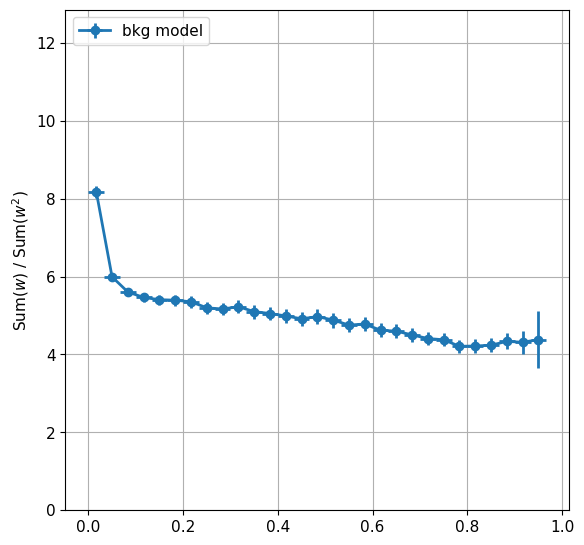

In [16]:
# plot_graphs((signal+bkg_model+bkg).apply(lambda t :effective_histogram(t, 'dHH_HH_regmass', bins=(200,1800,30))), log=True, legend=True)
plot_graphs((bkg_model).apply(lambda t :effective_histogram(t, 'bdt_score', bins=(0,1,31))), log=False, legend=True, ylabel='Sum($w$) / Sum($w^2$)', grid=True)


100%|██████████| 1/1 [00:03<00:00,  3.98s/it]


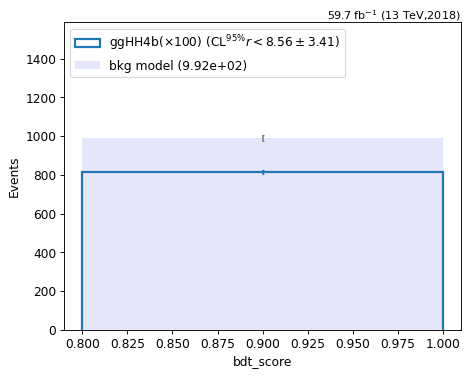

In [30]:
study.quick(
    signal+bkg_model,
    varlist=['bdt_score'],
    binlist=[(0.8,1.0,2)],
    plot_scale=[100],
    limits=True,legend=True,
)